### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing datasets

In [2]:
df1=pd.read_csv('exercise.csv')
df2=pd.read_csv('calories.csv')

### Exploratory data analysis

In [3]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
print("df1-shape:",df1.shape)
print("df2-shape:",df2.shape)

df1-shape: (15000, 8)
df2-shape: (15000, 2)


In [6]:
df2.drop('User_ID',axis=1,inplace=True)
df2.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [7]:
# Concanating two data frames 
df=pd.concat([df1,df2],axis=1)

In [8]:
# Now df is going to be our new datframe for our project
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
df.shape

(15000, 9)

In [10]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
# Checking for null values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Feature engineering

In [13]:
# Dropping irrelevant features
df.drop('User_ID',axis=1,inplace=True)

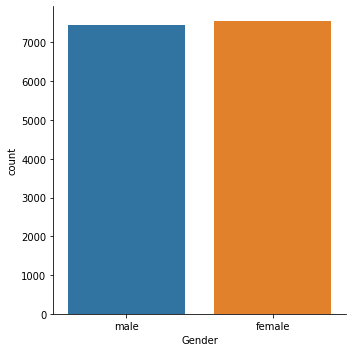

In [14]:
sns.catplot(x='Gender',data=df,kind="count")

In [15]:
# Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [16]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


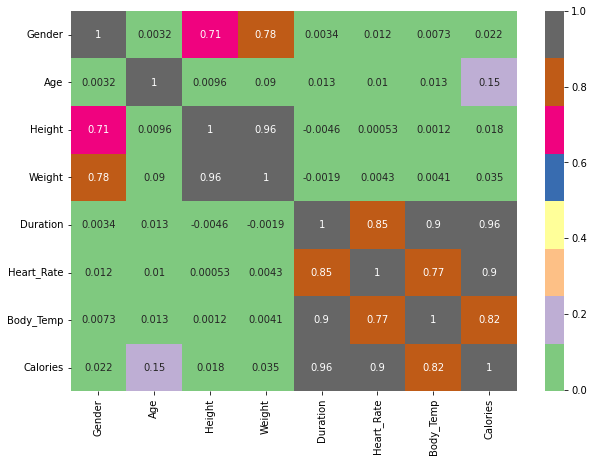

In [17]:
# Plotting correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Accent')
plt.show()

### Separating dependant and independant features

In [18]:
X=df.drop('Calories',axis=1)
y=df.Calories

### PErforming train-test_split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting linear regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
print("Train-accuracy:",lr.score(X_train,y_train))
print("Test-accuracy:",lr.score(X_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_hat))
print("MSE",mean_squared_error(y_test,y_hat))

Train-accuracy: 0.9671621074066676
Test-accuracy: 0.9657842604777692
MAE: 8.380435534510736
MSE 138.0875899544761


### Fitting decision tree regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
y_hat2=dr.predict(X_test)
print("Train-accuracy:",dr.score(X_train,y_train))
print("Test-accuracy:",dr.score(X_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_hat2))
print("MSE",mean_squared_error(y_test,y_hat2))

Train-accuracy: 1.0
Test-accuracy: 0.9932402354895635
MAE: 3.4183333333333334
MSE 27.281


### Fitting random forest regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
y_hat3=rr.predict(X_test)
print("Train-accuracy:",rr.score(X_train,y_train))
print("Test-accuracy:",rr.score(X_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_hat3))
print("MSE",mean_squared_error(y_test,y_hat3))

Train-accuracy: 0.9996918444931802
Test-accuracy: 0.997840115101183
MAE: 1.8595866666666667
MSE 8.716845066666666


### Fitting Xgboost regressor

In [24]:
from xgboost import XGBRegressor
xr=XGBRegressor()
xr.fit(X_train,y_train)
y_hat4=xr.predict(X_test)
print("Train-accuracy:",xr.score(X_train,y_train))
print("Test-accuracy:",xr.score(X_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_hat4))
print("MSE",mean_squared_error(y_test,y_hat4))

Train-accuracy: 0.9995680714638668
Test-accuracy: 0.9984939958515267
MAE: 1.6602564878463746
MSE 6.07791870723733


####  Thus we are going to use Xgboost regressor